In [0]:
from google.colab import drive
from importlib import reload  # Py3 only; unneeded in py2.

drive = reload(drive)
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

from sklearn.metrics import confusion_matrix


In [0]:
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from google.colab import files




In [0]:

from pathlib import Path
from glob2 import glob
import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
import random as ran

# files = zf.ZipFile("./drive/My Drive/dataset-resized.zip",'r')
# files.extractall()
# files.close()
# os.listdir(os.path.join(os.getcwd(),"dataset-resized"))

In [0]:
!ls drive/My\ Drive


 CA
'Colab Notebooks'
 dataset-resized.zip
 DBMS.gslides
 GPE-practice
 HW1
'Introduction to  Machine Learning  Final Project.gslides'
'ISMCTS PAPER.gslides'
'ML Final Project.gslides'
 Nogo
'palm picture tmp'
 Response1.csv
 Response1.xlsx
 Response2.xlsx
 Response.csv
'Sales & Deals by Slidesgo - 副本 (1).gslides'
'Sales & Deals by Slidesgo - 副本.gslides'
 SurakartaAI
 備審資料
 光球總驗.mp3
 四系聯合耶舞企劃書.pdf
'左手的掌心照 (File responses)'
 手機相簿
 承遠
'無標題表單 (1).gform'
'無標題表單 (File responses)'
 無標題表單.gform
'爆一 '
 迎宿活動組
'預測成績調查 (File responses)'


In [0]:
path_csv = 'drive/My Drive/Response4.xlsx 的副本'
# data_csv = pd.read_csv(path_csv)
data_csv = pd.read_excel(path_csv)
print(data_csv)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# downloaded = drive.CreateFile({'id': "1MMvuEKKwJlE8IRabv_3l25Bn9vsrILhp"})


                       時間戳記 就讀的學校  ... 生理性別 平均每天讀書時間(小時)
0   2019-12-22 22:49:19.746    交大  ...    男          0.5
1   2019-12-22 22:51:57.299  交通大學  ...  NaN          3.0
2   2019-12-22 22:54:00.141  交通大學  ...    女          1.0
3   2019-12-22 22:56:35.962  交通大學  ...    男          1.0
4   2019-12-22 22:59:32.474  交通大學  ...    男          4.0
..                      ...   ...  ...  ...          ...
179 2019-12-26 12:33:34.495  臺灣大學  ...    男          2.0
180 2019-12-26 14:33:31.547  清華大學  ...    男          4.0
181 2019-12-26 18:33:54.104  交通大學  ...    男          1.0
182 2019-12-26 23:29:46.756  佛光大學  ...    男          3.0
183 2019-12-27 00:58:56.384    清華  ...    男          4.0

[184 rows x 18 columns]


In [0]:
from PIL import Image, ExifTags
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import functools
from scipy.ndimage import gaussian_filter

def image_transpose_exif(im):
    """
        Apply Image.transpose to ensure 0th row of pixels is at the visual
        top of the image, and 0th column is the visual left-hand side.
        Return the original image if unable to determine the orientation.

        As per CIPA DC-008-2012, the orientation field contains an integer,
        1 through 8. Other values are reserved.
    """

    exif_orientation_tag = 0x0112
    exif_transpose_sequences = [                   # Val  0th row  0th col
        [],                                        #  0    (reserved)
        [],                                        #  1   top      left
        [Image.FLIP_LEFT_RIGHT],                   #  2   top      right
        [Image.ROTATE_180],                        #  3   bottom   right
        [Image.FLIP_TOP_BOTTOM],                   #  4   bottom   left
        [Image.FLIP_LEFT_RIGHT, Image.ROTATE_90],  #  5   left     top
        [Image.ROTATE_270],                        #  6   right    top
        [Image.FLIP_TOP_BOTTOM, Image.ROTATE_90],  #  7   right    bottom
        [Image.ROTATE_90],                         #  8   left     bottom
    ]

    try:
        seq = exif_transpose_sequences[im._getexif()[exif_orientation_tag]]
    except Exception:
        return im
    else:
        return functools.reduce(type(im).transpose, seq, im)

def convertjpg(jpgfile,width=384,height=512):
    try :
        image = Image.open(jpgfile)
        
        image = image_transpose_exif(image) # rotate image (some picture will be rotated after resizing, need to rotate back)
        image = image.convert('LA') # convert to grayscale
        image=image.resize((width, height), Image.ANTIALIAS) # resize image

        os.remove(os.path.join(os.getcwd(), jpgfile))
        
        img_convert = np.array(image)
        img_c = gaussian_filter(img_convert, sigma=0.7) # Gaussian Filter
        image = Image.fromarray(img_c )
        
        image.save(jpgfile)
        return 1

    except Exception as e:
        print(e)
        return 0


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['subplots', 'copy', 'pad', '__version__', 'partition', 'random', 'array', 'uniform']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


rm: cannot remove 'first': No such file or directory
rm: cannot remove 'second': No such file or directory
1MMvuEKKwJlE8IRabv_3l25Bn9vsrILhp
second_1.png


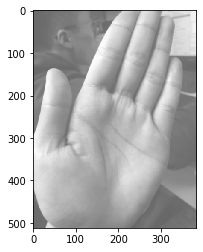

18D5cxSrRsuaMSo82AGgF5hB2edLhbing
first_1.png


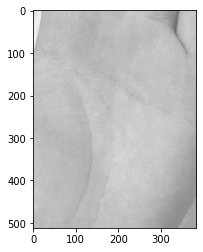

11UWapE3_jAv9CEf0b7JOahG8vTsTs0su
second_2.png


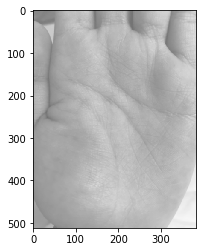

1t1n6PtBJufTe1xmpBcENLz0XZ-Dw3Kia
second_3.png


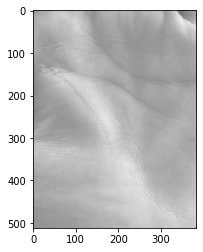

13pqP81usAEgtNK-hsgP9uhlifvg-vFJo
second_4.png


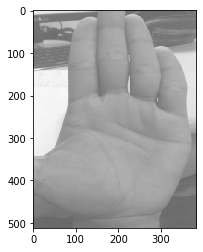

16kkDpHMOmWEDY9nl5FPYWthVQC-pzU6t
second_5.png


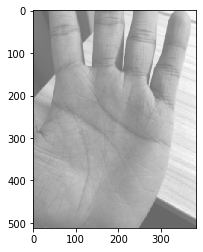

1RHj3ZekLFX0YUZuM4fyfSRcSOZ0eOe84
second_6.png


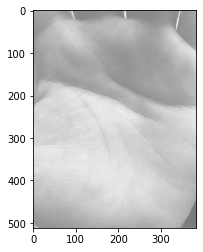

1k9T2AZZn1i8FEbG8z9G9XT0wCCVrLTPk
first_2.png


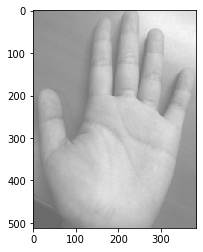

1nXSVYueSpyHeKcHZ8agMROjggKM7PfpN
second_7.png


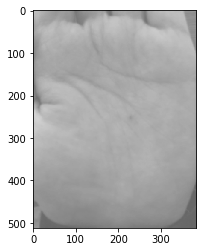

1dXfaIWC8v5sQ4nH9xZR-1PEb37TyMirV
second_8.png


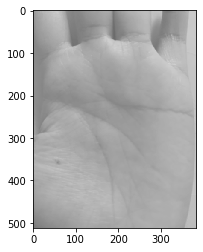

1yQFQ4LuwgqJQmPpjOlXfIdGbAbPEudPT
first_3.png


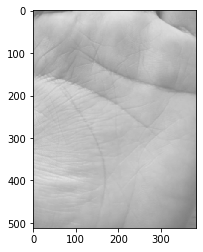

13qKudr2lKy7nIuF0eWMRBUZvqg1f6_68
first_4.png


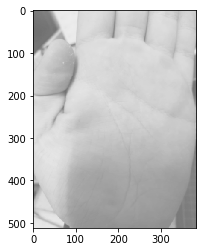

1tlDCeIQdy3AMSHSPgJR2gx16EavbA1eO
second_9.png


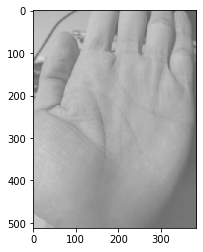

1F7qCOv-LjjbqH5LkZ_pwTwFYsoO6S-Gg
second_10.png


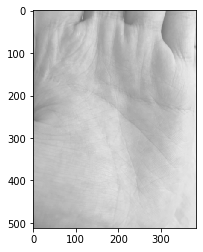

1wbQXrupshY3UHih62yNMCDe4fWJHph8n
second_11.png


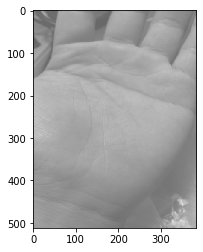

1Wo4dWIRnpbPwcthk5iANDsDRQgn3YXCV
second_12.png


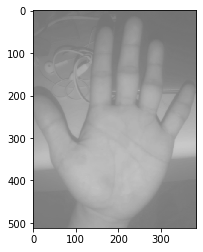

1d8eHB5i_NGERABCsVUJw5PwWdr5hwU3f
second_13.png


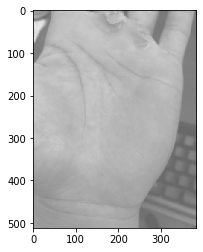

1ELxeUftUlLeXX36ArXzGPLY305AHVUMm
first_5.png


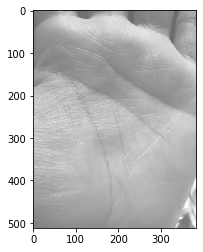

1kc-TlDTFhvyc7fwZxnB6VY-R7BdusQat
second_14.png


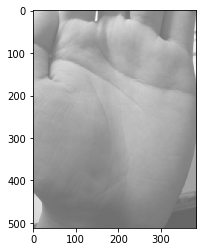

1RkV2D7ipT5Q8ZVkRHcZD7Vaf2bZoxZGw
second_15.png


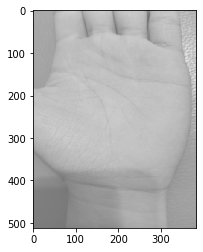

11s5ZZu5D6ImY3yIbvfPT-V8_26YNMYbY
first_6.png


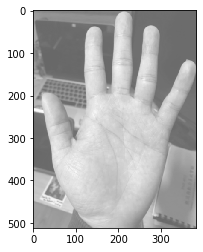

1n8p2eWD9qQx3AjOgcvTmcr9X1LrbFE2y
first_7.png


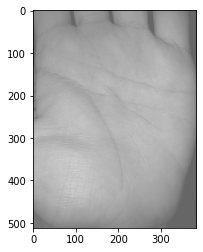

1YpkW3VFR7Pk3-M14UEDnuOgrdrO7T8gw
first_8.png


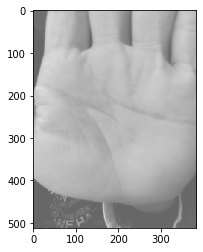

1zheUTlnkrdfhe-vF40p7hDq1pnLu3Gdm
second_16.png


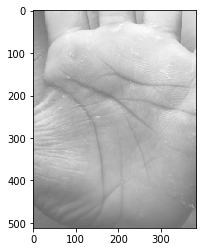

1sESUQb6TJB1zaPQn7Yu7rxoVy03QGCRy
first_9.png


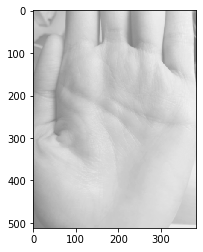

1w6BcyQHiBojJC_CVVSP8itNa-vqFE6Lw
first_10.png


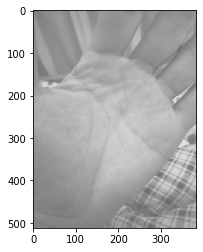

1-TFkMatXFRpiJ8wNCB0gJySrBGL2W0Qr
first_11.png


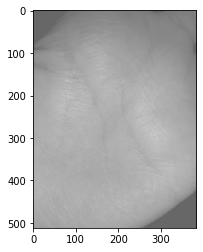

1tBhRkT1JB9stHX3RSscERa73npy7-8qZ
first_12.png


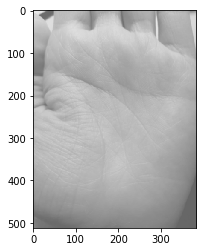

12tXKgpPnS6wH_IOjl97SxiS6KPx_S6Ck
second_17.png


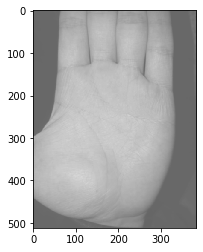

1c-Kj0wxpcTBmBghaV7jhd-M-gUshUhel
first_13.png


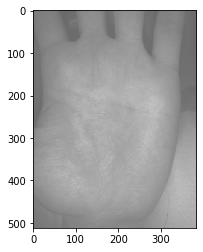

1zrTltJ02ycEMPkdoaNQp7RuiHgcqVSAK
first_14.png


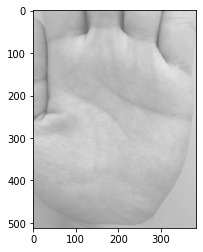

1Yt8qQ-pBxUgRME9P-uZ29ypR3OqyUNPZ
second_18.png


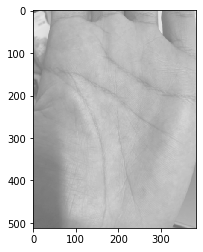

103JViRN8otBF6dw9_fn7Qxrpr16v6AZc
first_15.png


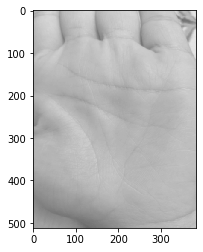

1l3gNl0rnqdGDx69O_puMdYNp9Wd6Tkek
first_16.png


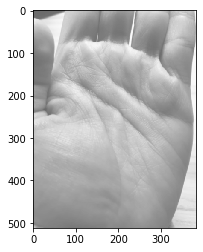

1Aa0m-gOPV5evInhCseT_jPYEf7v2G7Zr
second_19.png


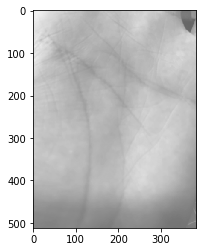

1v6LWhtYzQBulSOAVDt35jfJarIuwfVSb
first_17.png


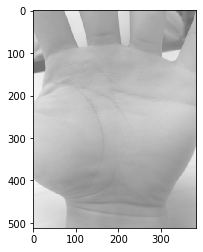

1YmHK0MXYiy4LOv-1xe4BWkCmAVVuXKW5
second_20.png


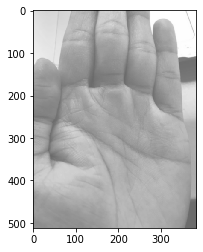

1A6ftybKTRwKF11jDYbnN2L9rU2Af4VkW
first_18.png


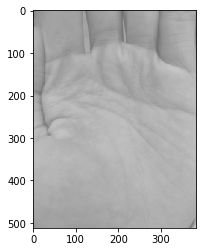

1hfnQDJ-ST3lMxcBl5qZdskOVDfDzdpHw
second_21.png


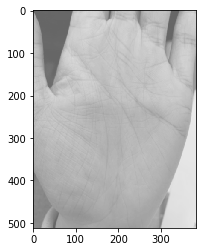

1TCl4yS4qjywwEjK_gjfvPUB4RWsjXGcc
first_19.png


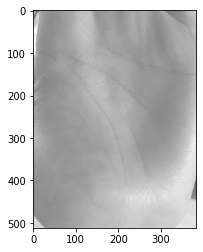

1mb7Wh6ijDS0o9F18j7SrTBjA2uqfKpqn
first_20.png


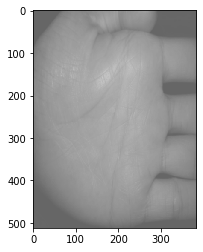

13CO1MViWaK1A-rXH8ffPlrBNBqRMQJ1t
second_22.png


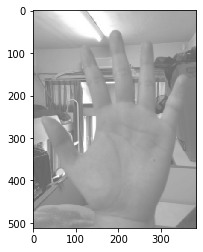

1b-PxNL4pjqhgv-g0979xtsrun_XetcA5
first_21.png


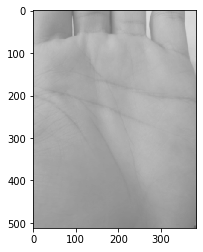

1AKS2OQQ3whGIl9oaphreFIoENwZPrukj
first_22.png


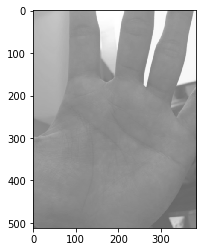

16ylFC-dIVwX7BziQoxW_FVy-JVAR3D77
second_23.png


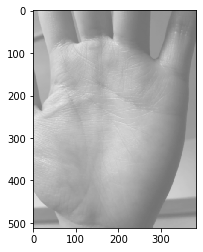

1KsZLDkOE9n6T9U5119leMlM7-rRbbhSO
first_23.png


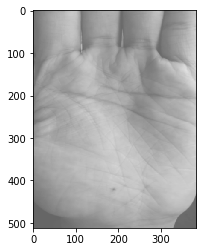

1d6lLNpMQ0TUS_NBDUD8HrSiDWF3W1gYK
second_24.png


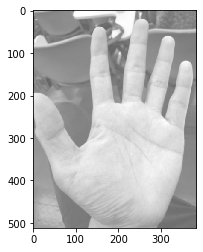

1H4zC91BGYOy2yYwTuUWM2qah_kJlRNFr
second_25.png


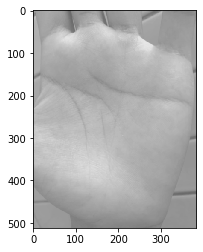

1BtHhdVqzVqnpFWAaZ9hm36A8EznVdj5E
second_26.png


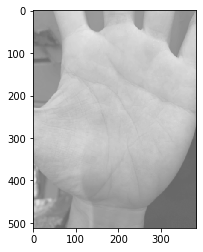

1pykuaiKPpA17F8BWtiGEJQdUsR5LxeRw
first_24.png


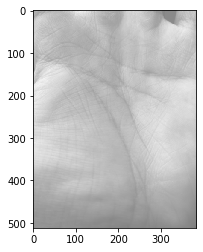

1iobEdBOoKU7CmMRa7Kt9NorBQa0ToFZ6
first_25.png


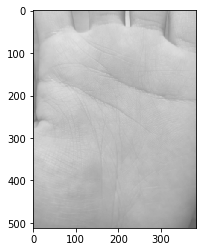

17o0UeZaNo63X4-hLYEzdedfXBriudhWC
first_26.png


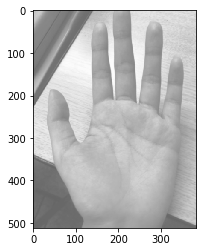

1vK_BiDf6kWPQtfCDnihY54jFRzvj33TD
first_27.png


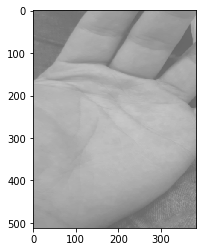

1IZXCqdbWFZIBqOO_sJJRmu2cXYXio9kx
second_27.png


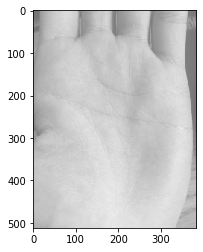

1A54eFQWEwIVsmDsy7I89wE_ybDawKHLU
second_28.png


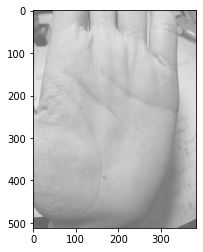

1UYeQ7QiLARaQAfEqLUPqNNPrjk6PhEau
first_28.png


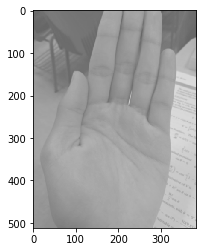

1MD2McrZHhobHvX14XaRG2jvIHVUr7Ek7
second_29.png


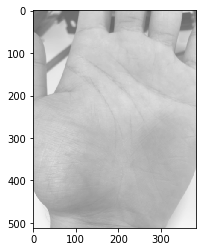

1zg8760-Co3bTEsfIuThUoNSlVrHxZQcZ
second_30.png


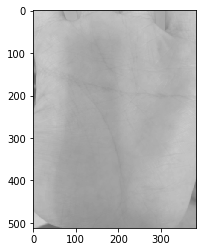

1O2f01sqvym41b5PJ6Z2IueWXBJiDNCxb
second_31.png


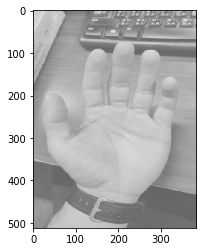

1gUKsAoj9F-LYKMK31nwUoQjfCnNaAEhz
second_32.png


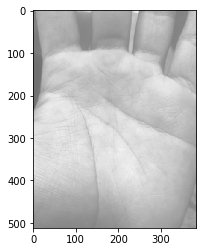

1kDKMIynX9fBrAjwrcARQZDUS8IuiRTiz
second_33.png


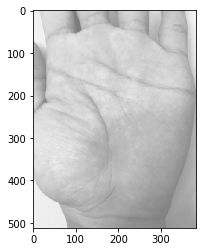

1jictvSLjBlyM2Zd5X86j98YLtaAUU2Fa
second_34.png


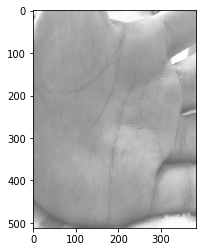

1xFEcQHMLsp_ueMCk9PpPllm5PK42mrXN
second_35.png


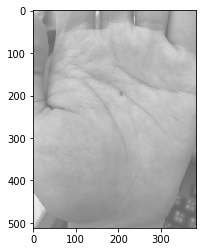

1nqn51dSPqKkAo3u1Tj2dus4DKxqJp7mQ
second_36.png


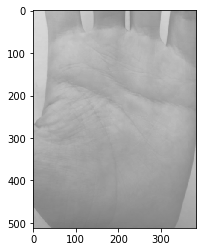

1tinyvtcfYfRgoGS2emXECg3rL7iebTDR
second_37.png


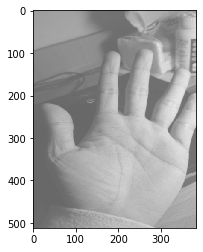

16p3LzIh9POsC4mTIgfWBOzfmR20miae-
second_38.png


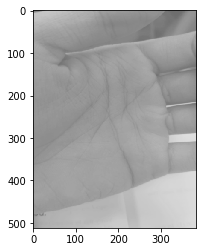

1X8LV9k1JUb1JYhULOlFqgwgC-QRiqsMh
first_29.png


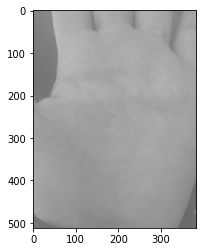

1dXLFduKvwe3mSxmEpqbhkoBR5c3ZNhRJ
second_39.png


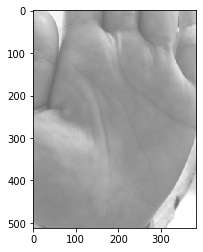

1oB4oZ3NaBV0Z83RIpxmB5iFCqP8ziFAQ
first_30.png


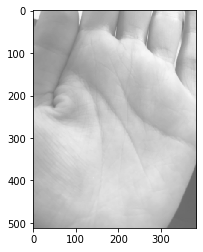

1xSrVDDLAhTnkm4gP8Ss-CbZ7rM2FMmxr
first_31.png


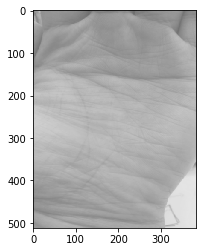

1AQjJrXaTslGThs78FdXx38bu4gD9-f8T
second_40.png


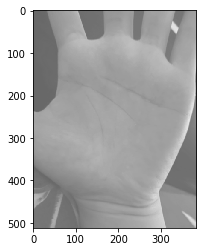

1oHNX-VHS0SmbHxx91HHzrSGBWtJ5nA5u
first_32.png


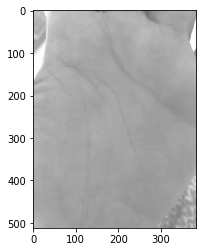

1gr7SxVJHbRXS3Sx_eCf0AWq_9sjNJ2E8
second_41.png


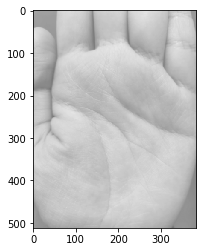

1yumpUGYiEvVDsJ6jWSE3GwgF6JWj772L
first_33.png


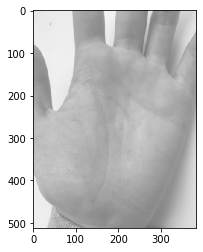

1Z5AonX_6JOkgX6hPk_9Ipv-swUb9feZf
first_34.png


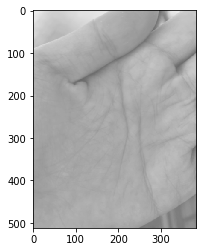

1DHvvt0T6Naeo8_o5Wiu2pKt8RRSdmjGQ
second_42.png


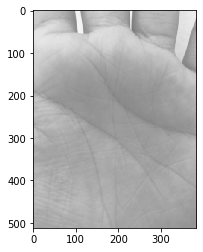

1LTsXsjSO7zE270Nf9FhpZ4Q8nvbc7n-z
second_43.png


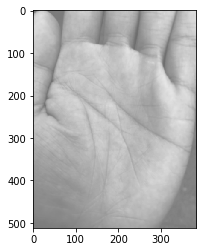

1JEZe0UNNSCez5hf0LeUBbC6rcWAkkkCr
first_35.png


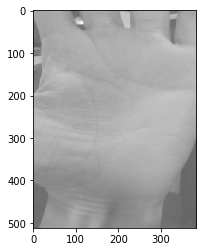

1Qx7b-mSzh3A7LxXJC5c0xO5QViL0lj6G
second_44.png


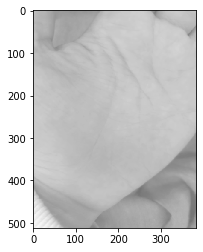

19xOGv4GRYlbEEt5EsqDESbOLEuz-Q96B
second_45.png


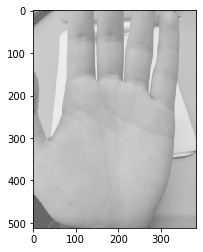

11_O9HjrDbDyH3yOJ4SJ5ifzYu5UMBXQm
second_46.png


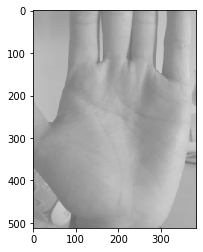

1EsXEYLc1Vt5-fICVEt6SOxOO_9U-O5Zj
second_47.png


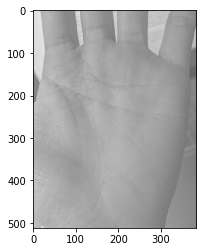

1FHjHT1BzREDj8HRUktYyxEoSIxwz5Utq
second_48.png


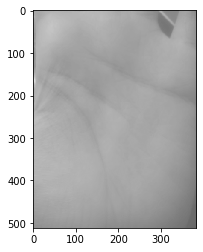

1ct_bOYZvYomaa7vaiK2CD-D1QLKXPmww
second_49.png


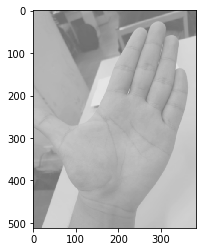

1rQO9FM3QJSuWL9-Ip8aqiravEaGFT_hk
second_50.png


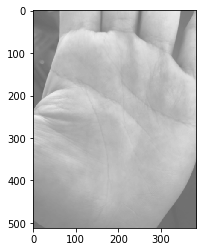

1hyNiX-q23Yl7XirshCykLi3ngczmYS81
second_51.png


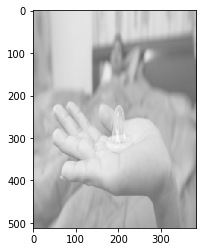

1QwqvimgMzf6sc9pB-OfiQdgDlIX6CpEY
first_36.png


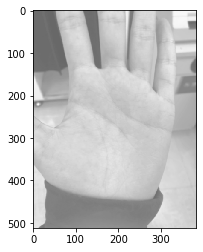

1oeaK818X9cPv2-k403FXcIjfkIF8N6yg
second_52.png


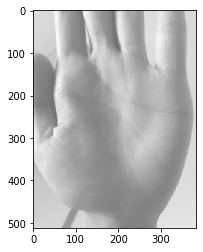

1FcWEScwNZuO4UZgx9fUqZ_It4sFPdnaC
second_53.png


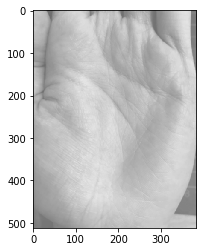

1h8Z2DAFdDvAC-FfOUF8dVklywcaBZLDg
second_54.png


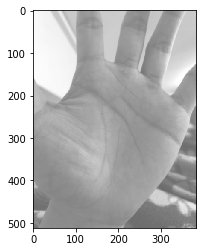

1g3WaW_-PIa9fPKQZ2zYDxIAuFdB-_PmA
first_37.png


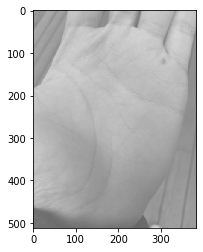

1WrSLXcSpIhcPyWv-Jai2PchnqRqfjqEB
first_38.png


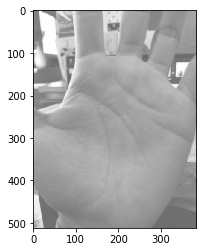

1l_NPFVkSQP0K8AO4yRmQwo2y9-ZRVMeq
second_55.png


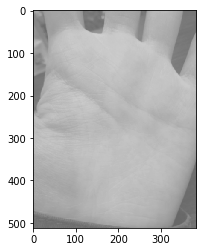

1I0Mxc4AH-wiaK5PFxQ20lBozCbYELf4l
second_56.png


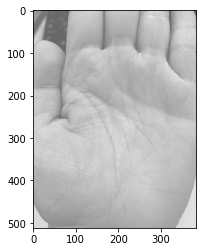

1rLl2M1AYoqhjXO7x4bbaftVatJLUC1PG
second_57.png


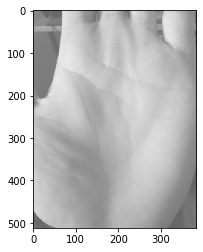

1APJ-kf-Arm9R1XTa1Cik_gF3d04aLtno
first_39.png


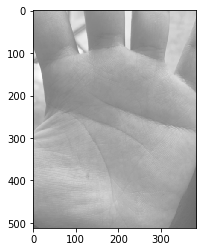

1a_anw7BnEnQmQqplaOKIbGp7q9bz2Izc
first_40.png


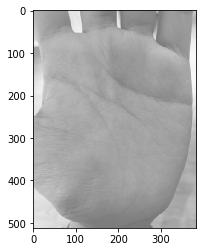

1C5yCJlDN12jqr_pgMvt_5ZH1l_0KDOxX
first_41.png


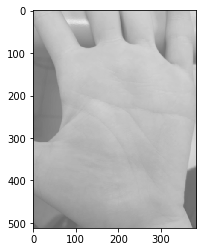

1CcQN7E-ffyXmYRh63SR5F3JqTBfXO_ia
second_58.png


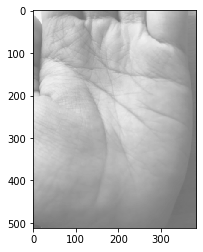

1jU23SYHBIHSZAUKoP23E5bM3B8dtpMS8
first_42.png


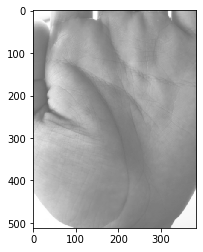

1wm0KSASfB_WFbFlrZdO9peU91Pe9U5Py
second_59.png


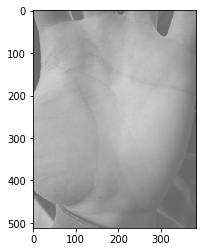

1-vrEkGRiuK7l4tvU95vbUArZQwmbxTol
first_43.png


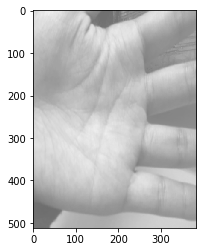

1h9SWD1Oaiql6fKPzHEWL8Qyv_98QtLrR
first_44.png


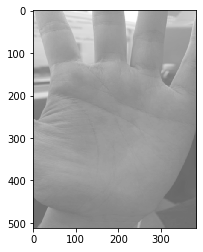

1LdCvPEsYxZ9gj8UpDwFCW3x9RxYAfQLE
first_45.png


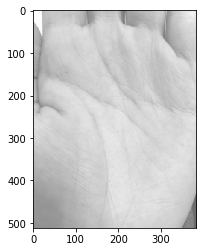

1yEaZZclGv8aWQM6Z2ENmgHC41QMPg2og
second_60.png


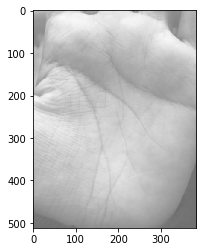

1S0WhQB_BN391Ycy3f7er0gqoxpgj3a-q
second_61.png


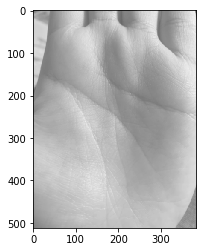

1lAIbfNyAnk1m7_yDfSS-n0uRlUKDirwa
first_46.png


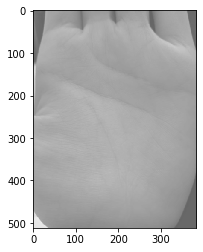

1m5dL04q91MCcdFJ6Wt0EceCcaac0osSx
first_47.png


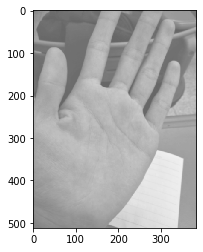

1TFzPuH7Y96YfiH5p_gd4-oaqcohpgZNz
first_48.png


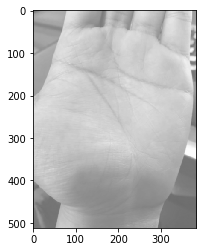

1bxVgEFjsT9arUBgIm7fvirvsa0bxI1yt
first_49.png


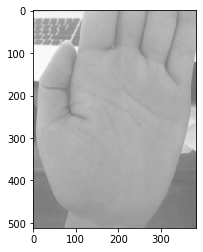

1yL5tuMwkz5VRz-oRxpdEhXI3LdTVi4vG
second_62.png


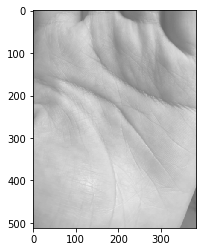

1NmYIItFMp1vKbx7KnpAkH3y-xeFgtPpe
first_50.png


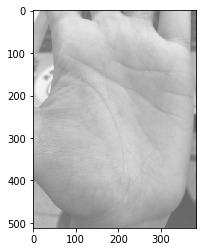

1oBqF_VK_gp8d9_4Xulamd5FzTSe1BcHR
first_51.png


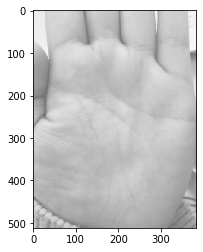

1Sc3IUrsNx81wTbWfrZ2kSdflRFSbGB_V
first_52.png


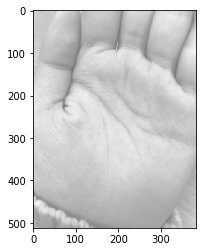

14UPQDEeEiE1PSQw_2YwbqY-qtdBgXOz8
second_63.png


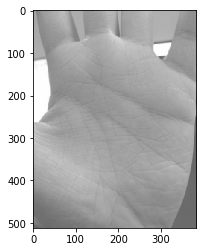

1GDxHjse1G45qaUoxZ7M2aAPszOVwTI0l
second_64.png


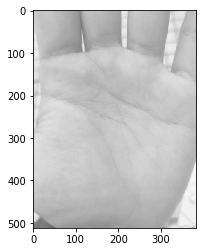

1SPQx3LrHzIrSJlut7m70R6O_MxO9cI8X
first_53.png


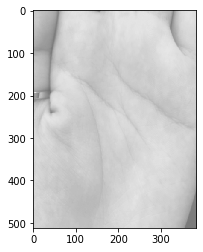

1Jg2P76p-4HxAR1kCVy9XzjyoqdKoR7b-
first_54.png


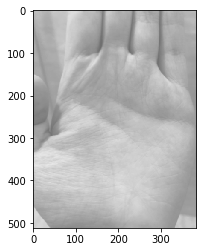

1CBpPj7wNBU4iyz7vb0wXS2Ushs1UOrbi
second_65.png


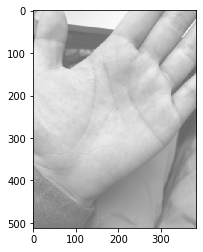

1SzuwokD8AWry6mBacn-kqchZzn93RY99
second_66.png


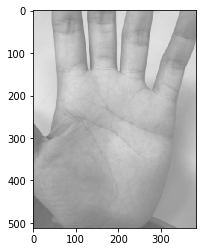

1xwNsfFP68L4HvsucbqdolncPWskStNpT
first_55.png


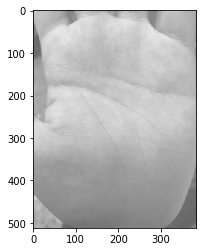

1rAnJTA-r5Wv7oHxN4vwpKzMFO0JERPf7
first_56.png


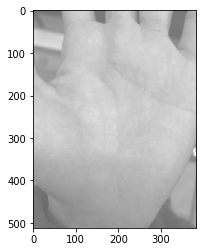

1MIlsWTPulKVOoA_gc5e6X0ttzv_TiZT8
second_67.png


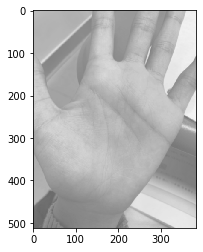

1rZrQ0dxs6I5k2ZXt-wvT5XKhFpY1TlUc
second_68.png


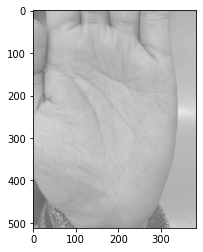

1Qc-S2wxEFu80pqerJwDhpLLsVVAwfMaa
first_57.png


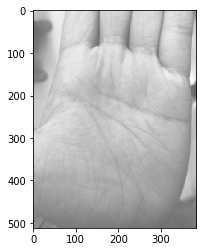

1zHDU73v-kSqqAbJ9WAwQtcLLgPnjYUFY
first_58.png


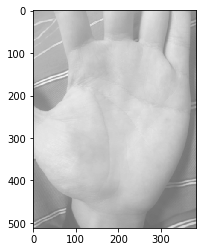

11BPdjldS65zuB50KS1kI3faPQGoWT6sL
first_59.png


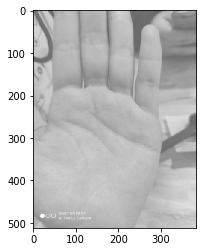

1I7fRZbOHlHllGDtJNf045dSCNEA852FN
first_60.png


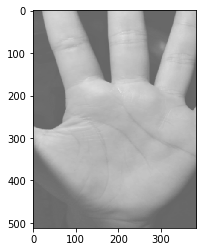

1UdvKQKFEoEg3ct3SMkel6AubWV0IQbC2
first_61.png


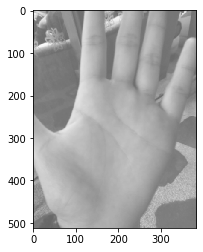

1TCXN0umkKaPMgV_nK8I_W_wVrlItiFl-
first_62.png


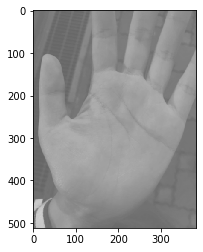

1o3cie1MMJ3OOwIHIwqFsJUYrlpkAXM6w
first_63.png


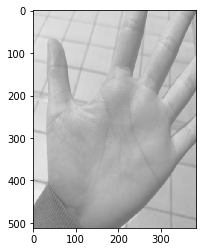

1agQt8CciRS9WxWRO4av4tKyaBkBdaqnp
first_64.png


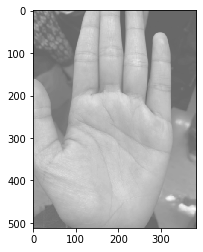

1WsuUx7aTI_2mKcypYR140ZV11ATS0O3L
first_65.png


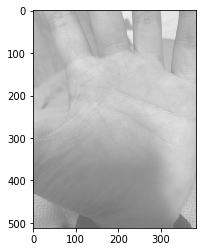

18Qs-mGQtH9vWJqonwFuTa-0Z-cXDDF0Q
first_66.png


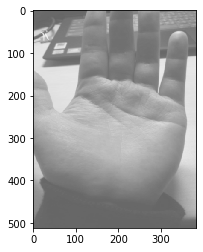

17pg0l3CnnDeQL6VwYVx1sesQW0Y3r0kz
first_67.png


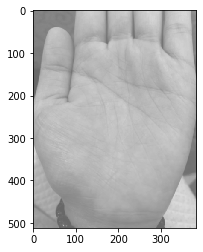

1H5wuYw-Tv5-RFerhbbNtdgISiVyOV5Q5
first_68.png


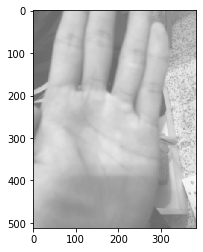

1QKunbBYzlwsZBstly8UyE2IFl0qI-f-5
second_69.png


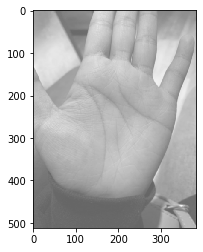

1a1Jb1NkHd46dhwwZsguplXFn2vgu9HDU
first_69.png


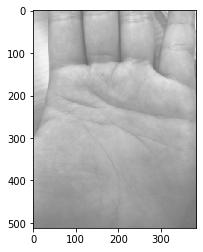

1UqangXGSA-EeYcF9gKDgdIQ76kSOOQww
first_70.png


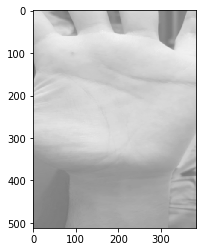

1iyE5mdyuJSMREdaIxC4wgq-LUcyXhXMf
first_71.png


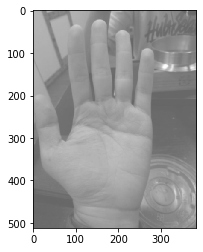

1ooC9xWPRuRZywmkI3lwcMq85WUubwRGZ
first_72.png


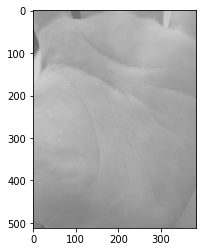

17WemTNGpYx5KE6RV-bURyqdAuiRBFI4X
second_70.png


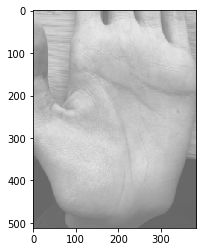

1Dkuh1vTSbd3_nZDukse54FW5Sf1DbTzZ
second_71.png


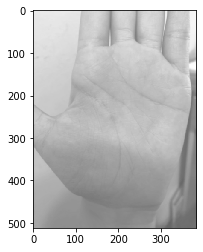

1cCJGEmgkL525tEel0FVHQn4SykNuLGgd
first_73.png


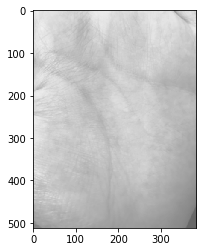

1SwnVuBY0fwJPbfrxbWgyV76laeLAmCIo
second_72.png


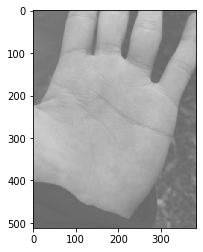

1_0uvpuZM3iW6uWZG3UMgHHTZFuhGS5Sj
second_73.png


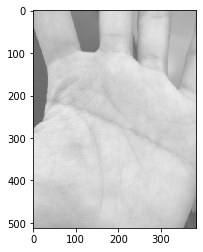

1zAjNi8_gyN6PEqhnQd0V6PCUBwxb4BTI
second_74.png


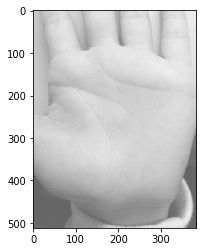

1PMyNWr8J6d6-ZWkaAaWAiLTwl8E8UsGs
second_75.png


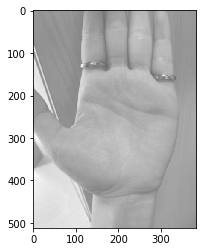

1tuZHGn7m5xaEJMDVvirHdfhk1Bjajsfu
first_74.png


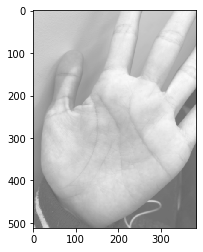

11Jvbsc39dUEF9DbLI46Cg6j7tTVqXF-x
first_75.png


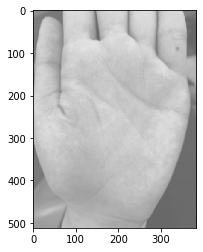

17YMZtCxbn9RbSU_4v1E9-KJLAyF8p7T3
first_76.png


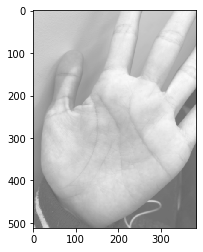

1XVJhR_08ywqkE6IzEcespUsSl8HWFg7V
first_77.png


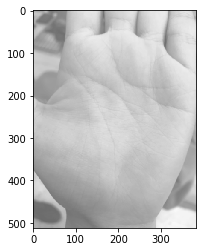

1rSKIgNXU7Ts1O6BjwycAKdsvMTzs9k33
first_78.png


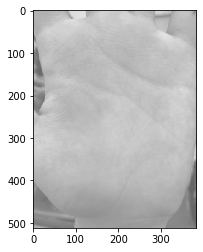

1dEOUqk88m_pyYNXcHns86zIapJuA1ZAs
second_76.png


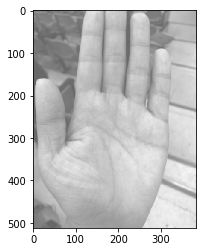

1hzBr0VGCNr89cVEzF8wrMIhFAB9EDqpY
second_77.png


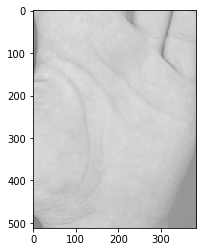

1X_7NZApFm65rxG2t14a_N-WUJVEhHRBl
second_78.png


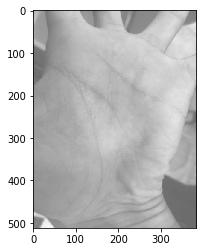

1z2R1e9sOy1u75cPjfgOMIXubY2Gasq9y
second_79.png


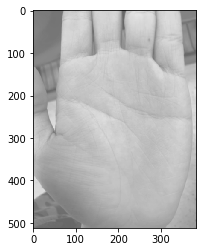

1Tbw-k3oI5Uk3f4QKyJFFM3Ou9LvqsiFL
second_80.png


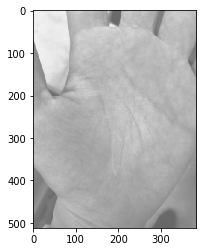

1Fn9ct0Y5oSa1O-9aou3SlXRpTrpNgfey
first_79.png


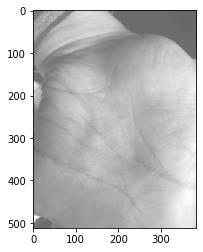

1LuIirX4yEZ2MEGCUt2RodghhGZerut1c
second_81.png


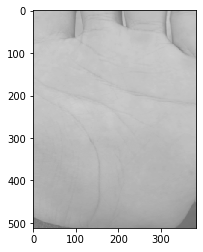

1PEzHIPThl1AzBXl1oKctoe8mlJAR4nXy
first_80.png


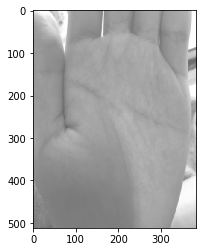

1IoOwMN1_FGm4rMYb07KJIVBt2GN72jyA
first_81.png


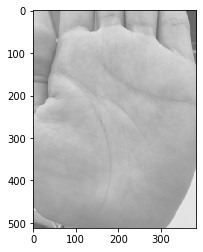

1G0DZomCpExPFN6OHowQPP20XW8zJv7nI
first_82.png


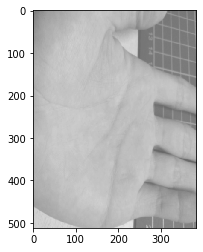

1PI12lI3OFtPJ8q2u-ZB2fpXJuUb7DRLN
first_83.png


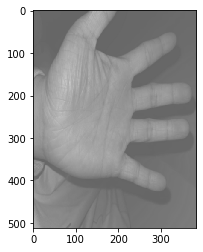

1cebe9ifisnVSlscwlfulVQ4by192aW7j
second_82.png


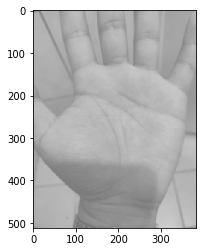

1qJwH2O4SRoKDO9kfTZc1AlEzV4ZXXEpA
first_84.png


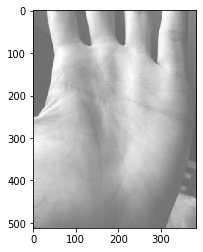

1MJgYbgdTrHryidLl2Ky0qXGLk3P3ghqA
first_85.png


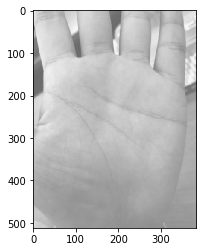

1kBtsLCuE5Wc5W8Zj6975TWpAxHdc-W2v
second_83.png


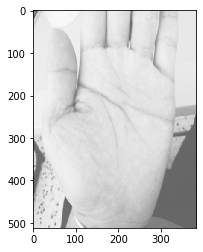

1RC6sH0BTUH1OYITNoE7xJWvSabD0CBJ0
first_86.png


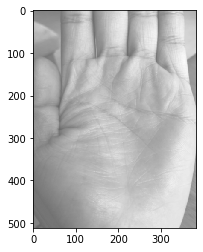

1_dctSmahxgHXACYFS1frslakqQ1_dOZr
second_84.png


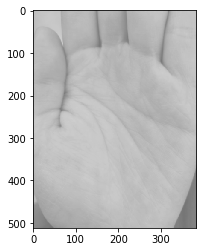

1cwPgjDVangCe3KRotlRXRFWqwCfo9RVp
first_87.png


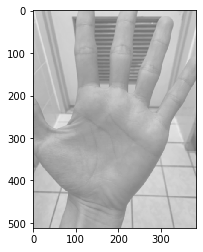

1g83wRZ6-eJj4wA4KT080ZagZLzva1RuU
second_85.png


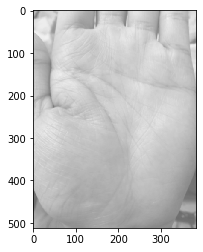

1RK7YeoPvv_cX7Hux4Gpq0XkoxOfm78F4
first_88.png


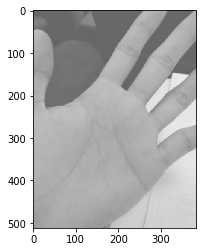

1KutaLDzQe-bJg894uzztwmbGlp1ccZhQ
second_86.png


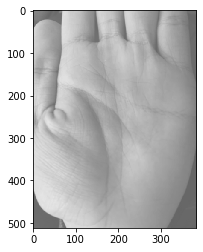

196yDdbn-fEtZrzSHLvzLdtFjOJeo34-t
second_87.png


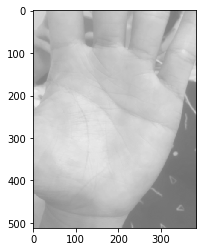

1IHip9zAtXmbEn0sIIVMps5oZ3G51AQ40
second_88.png


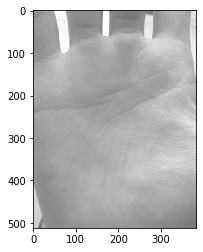

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import functools

!rm -r first second 
!mkdir -p first second 
# !mv mnist_test.csv ./top30
# !cd /content/top30
# !ls 
cnt1, cnt2, cnt3 = 1, 1, 1

for row in  data_csv.index:
    # grade = data_csv.loc[row, "生理性別"]
    grade = data_csv.loc[row, "平均成績％數"]
    pic_ID = data_csv.loc[row, "左手的掌心照"]
    
    pic_ID = pic_ID[pic_ID.find("id")+3:]
    if pic_ID in ["1L-DTFqfoj0MKAyG1MCIBYuC0tCTUNby1", "1saw4I-6_Oo-37tOcSqq5ceLA-WIz_vj4", "1invk7pqN5BeaXBtXa3gQRTZ7vICmm08F", "1UrImTDWGqBPHtP4fzREf77i7Kow7w23t", "1aPl6uKvUYwGL-yt6I1x8ILDVONdFJTeU", "1Cf9lkd89gRhDbJxl9POhPFPWy8uGVcgG", "1FwU9BEojTnnCZ_k2NwmUzukuyAl_LkB6", "1EmWAdyIoK7QZ7I9wkK1tSXiY6K4V1zHS" ]:
        continue
    # print(pic_ID)
    downloaded = drive.CreateFile({'id': pic_ID})
    print(pic_ID)

    if grade=="0-10%" or grade=="11-20%" or grade=="21-30%" or grade=="31-40%":
        pic_name = "first_" + str(cnt1) + ".png"
        print(pic_name)
        downloaded.GetContentFile(pic_name)
        succ = convertjpg(pic_name)
        if succ==0:
            os.remove(os.getcwd()+"/"+pic_name)
            continue;
        cnt1 += 1

        img=mpimg.imread(pic_name)
        imgplot = plt.imshow(img)
        plt.show()
        shutil.move(pic_name, "first/")
    
    else:
        pic_name = "second_" + str(cnt2) + ".png"
        print(pic_name)
        downloaded.GetContentFile(pic_name)
        succ = convertjpg(pic_name)
        if succ==0:
            os.remove(os.getcwd()+"/"+pic_name)
            continue;
        cnt2 += 1

        img=mpimg.imread(pic_name)
        imgplot = plt.imshow(img)
        plt.show()
        shutil.move(pic_name, "second/")
    # elif grade=="三類組":
    #     pic_name = "third_" + str(cnt3) + ".jpg"
    #     downloaded.GetContentFile(pic_name)
    #     succ = convertjpg(pic_name)
    #     if succ==0:
    #         os.remove(os.getcwd()+"/"+pic_name)
    #         continue;
    #     cnt3 += 1

    #     img=mpimg.imread(pic_name)
    #     imgplot = plt.imshow(img)
    #     plt.show()
    #     shutil.move(pic_name, "third/")
    # if grade=="0-10%" or grade == "11-20%" or grade == "21-30%":
    #     pic_name = "top30_" + str(cnt1) +".jpg"
    #     downloaded.GetContentFile(pic_name)
    #     succ = convertjpg(pic_name, os.getcwd()+"/top30")
    #     if succ==0:
    #         os.remove(os.getcwd()+"/"+pic_name)
    #         continue;
    #     cnt1 += 1
        
    #     img=mpimg.imread(pic_name)
    #     imgplot = plt.imshow(img)
    #     plt.show()

    #     shutil.move(pic_name, "top30/")
    #     # !mv {pic_name} ./top30

    # elif grade == "31-40%" or grade == "41-50%" or grade == "51-60%":
    #     pic_name = "mid30_" + str(cnt2) +".jpg"
    #     downloaded.GetContentFile(pic_name)
    #     succ = convertjpg(pic_name, os.getcwd()+"/mid30")
    #     if succ==0:
    #         os.remove(os.getcwd()+"/"+pic_name)

    #         continue;
    #     cnt2 += 1
        
    #     img=mpimg.imread(pic_name)
    #     imgplot = plt.imshow(img)
    #     plt.show()
       
    #     shutil.move(pic_name, "mid30/")

    #     # !mv {pic_name} ./mid30
    # else:
    #     pic_name = "back40_" + str(cnt3) +".jpg"
    #     downloaded.GetContentFile(pic_name)
    #     succ = convertjpg(pic_name, os.getcwd()+"/back40")
    #     if succ==0:
    #         os.remove(os.getcwd()+"/"+pic_name)

    #         continue;
    #     cnt3 += 1
        
    #     img=mpimg.imread(pic_name)
    #     imgplot = plt.imshow(img)
    #     plt.show()
        
    #     shutil.move(pic_name, "back40/")

        # !mv {pic_name} ./back40

In [0]:
## helper functions ##

## splits indices for a folder into train, validation, and test indices with random sampling
    ## input: folder path
    ## output: train, valid, and test indices    
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    
        
    full_set = list(range(1,n+1))

    ## train indices
    ran.seed(seed1)
    train = ran.sample(list(range(1,n+1)),int(.5*n))

    ## temp
    remain = list(set(full_set)-set(train))
    # valid = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    ran.seed(seed2)
    valid = ran.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid, test)

## gets file names for a particular type of trash, given indices
    ## input: waste category and indices
    ## output: file names 
def get_names(waste_type,indices):
    file_names = [waste_type+"_"+str(i)+".png" for i in indices]
    return(file_names)    

## moves group of source files to another folder
    ## input: list of source files and destination folder
    ## no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.copy(file,destination_folder)

In [0]:
## paths will be train/cardboard, train/glass, etc...
subsets = ['train','valid']

grade_types = ['first', 'second']
!rm -r data/train data/valid data/test
## create destination folders for data subset and waste type
for subset in subsets:
    for grade_type in grade_types:
        folder = os.path.join('data',subset,grade_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
## move files to destination folders for each waste type
for grade_type in grade_types:
    source_folder = grade_type
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    ## move source files to train
    train_names = get_names(grade_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/"+grade_type
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(grade_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+grade_type
    move_files(valid_source_files,valid_dest)
    
    ## move source files to test
    test_names = get_names(grade_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    ## I use data/test here because the images can be mixed up
    move_files(test_source_files,"data/test")

rm: cannot remove 'data/train': No such file or directory
rm: cannot remove 'data/valid': No such file or directory
rm: cannot remove 'data/test': No such file or directory


In [0]:
## get a path to the folder with images
path = Path(os.getcwd())/"data"
print(path)

/content/data


In [0]:
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,test="test", bs=20)
# data = ImageDataBunch.from_folder(path, bs=40)
data

ImageDataBunch;

Train: LabelList (88 items)
x: ImageList
Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 384)
y: CategoryList
second,second,second,second,second
Path: /content/data;

Valid: LabelList (44 items)
x: ImageList
Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 384)
y: CategoryList
second,second,second,second,second
Path: /content/data;

Test: LabelList (44 items)
x: ImageList
Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 384)
y: EmptyLabelList
,,,,
Path: /content/data

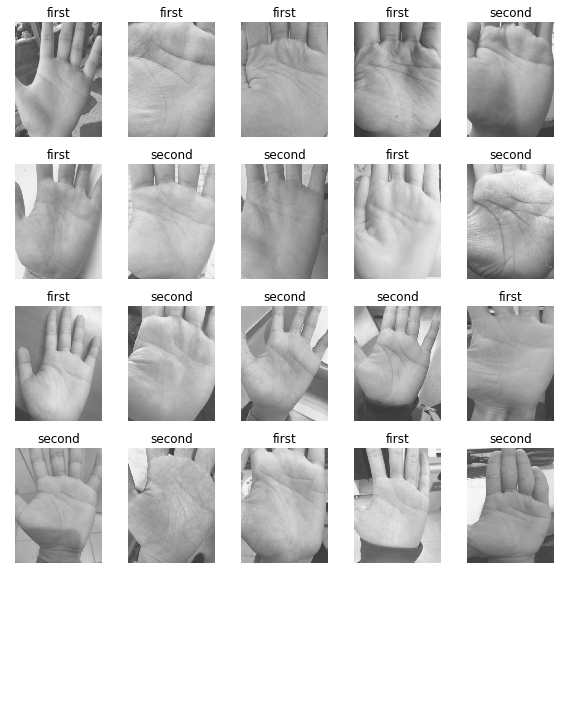

In [0]:
data.show_batch(rows=5, figsize=(8,10))

In [0]:
learn = cnn_learner(data,models.resnet34, metrics=[error_rate], callback_fns=ShowGraph)
learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 185MB/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-03
Min loss divided by 10: 4.79E-03


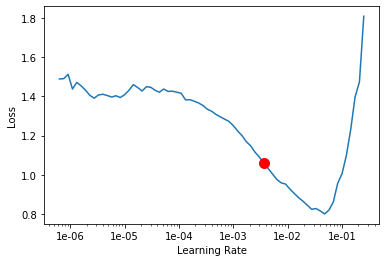

In [0]:
learn.lr_find(start_lr=1e-7,end_lr=1e1)
learn.recorder.plot(suggestion=True)

In [0]:
DatasetType.Train

<DatasetType.Train: 1>

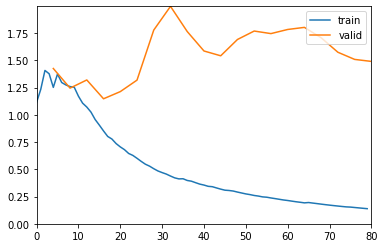

In [0]:
learn.fit_one_cycle(20,max_lr=3.02E-03)

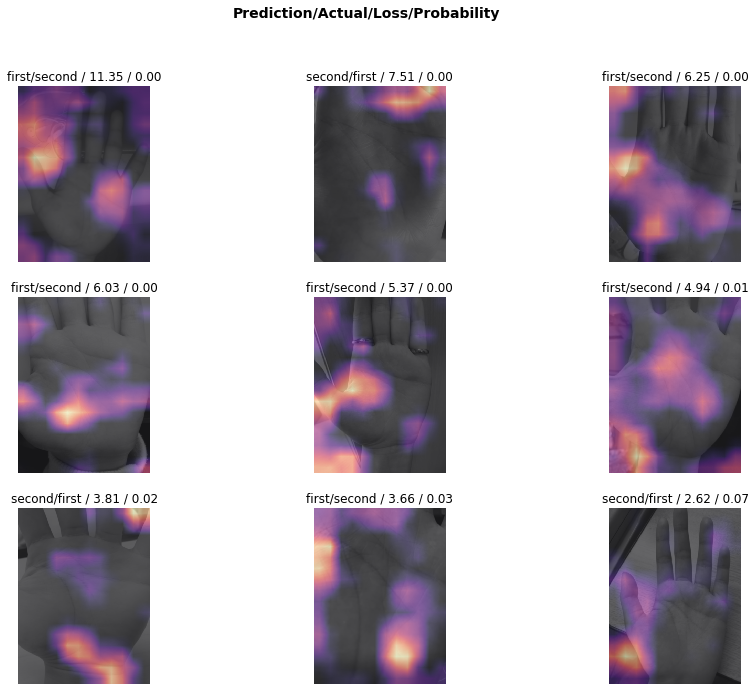

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_top_losses(9, heatmap=True, figsize=(15,11))


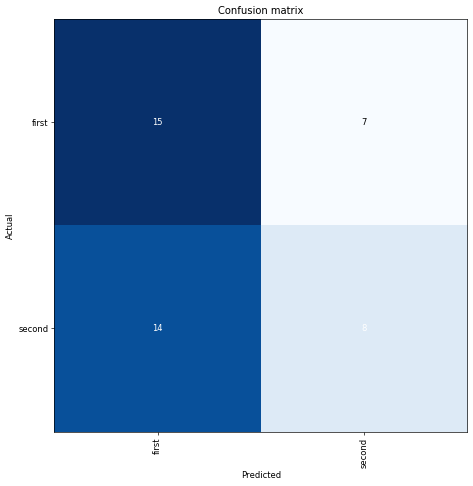

In [0]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [0]:
preds = learn.get_preds(ds_type=DatasetType.Valid)
print( len(preds[0]))


# preds = learn.get_preds()


44


In [0]:
## saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])
print(yhat)
print(preds[1])

['first', 'second', 'first', 'first', 'first', 'first', 'first', 'second', 'second', 'first', 'second', 'first', 'first', 'second', 'second', 'second', 'first', 'second', 'first', 'first', 'second', 'first', 'second', 'second', 'second', 'second', 'first', 'second', 'first', 'second', 'first', 'first', 'first', 'first', 'first', 'second', 'first', 'second', 'first', 'second', 'first', 'first', 'first', 'first']
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [0]:
y = []

## convert POSIX paths to string first
for label_path in data.valid_ds.items:
    y.append(str(label_path))
print(len(y))
## then extract type from file path
pattern = re.compile("([a-z]+)_[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

44


In [0]:
## predicted values
print(yhat[0:5])
## actual values
print(y[0:5])

['first', 'first', 'first', 'first', 'first']
['first', 'first', 'first', 'first', 'first']


[[13  9]
 [13  9]]


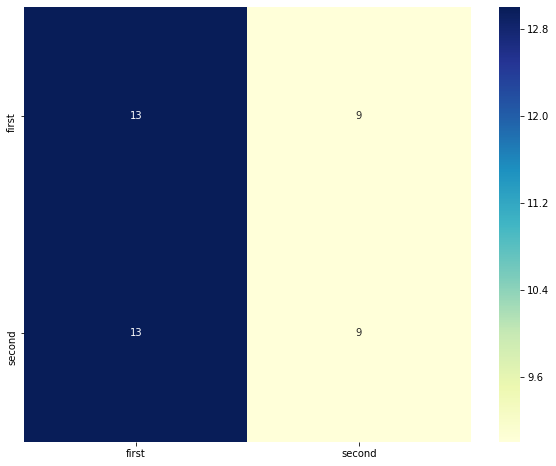

In [0]:
cm = confusion_matrix(y,yhat, labels=["first", "second"])
print(cm)
df_cm = pd.DataFrame(cm,grade_types,grade_types)

plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")


In [0]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        
        if (r==c):
            correct += cm[r,c]
accuracy = correct/sum(sum(cm))
accuracy

0.5

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


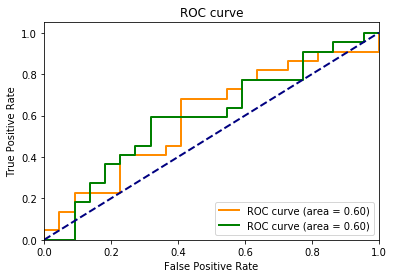

In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
import numpy as np
from sklearn import metrics

# print(y)
y_ = pd.get_dummies(y)
# print(y_)
# print(y_.iloc[:,1])
# print(preds[0][:])
# print(preds[0][:,0])
# print(y_.iloc[:,0])

for i in range(2):
    fpr[i], tpr[i], _ = metrics.roc_curve( y_.iloc[:, i], preds[0][:,i] ) 
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
plt.figure()
lw = 2
col = ['darkorange', 'green', 'red']
# for i in range(2):
    # plt.plot(fpr[i], tpr[i], color=col[i],
            # lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot(fpr[0], tpr[0], color=col[0],
            lw=lw, label='first (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color=col[1],
            lw=lw, label='second (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense



classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/valid',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history = classifier.fit_generator(training_set,
                         samples_per_epoch = 128,
                         nb_epoch = 50,
                         validation_data = test_set)

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.legend(['validation'], loc='upper left')
plt.title('validation loss vs epoch')
plt.ylabel('validation loss')
plt.xlabel('Epoch')

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_acc'])
plt.legend(['validation'], loc='upper left')
plt.title('validation accuracy vs epoch')
plt.ylabel('validation accuracy')
plt.xlabel('Epoch')

Using TensorFlow backend.


In [0]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
print(type(y_test))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<class 'numpy.ndarray'>
